In [1]:
!nvidia-smi

Tue Feb 10 04:39:48 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 591.86                 Driver Version: 591.86         CUDA Version: 13.1     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   44C    P8              1W /  105W |     354MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, MaxPooling2D
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling
from pathlib import Path
from tensorflow.data import experimental
from PIL import Image
from pathlib import Path
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [3]:
training_set = image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70293 files belonging to 38 classes.


In [4]:
validation_set = image_dataset_from_directory(
   'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [5]:
num_classes = len(training_set.class_names)

model = Sequential([
    Rescaling(1./255, input_shape=(128, 128, 3)),

    Conv2D(128, kernel_size=3, padding='same', activation='relu'),
    Conv2D(128, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2, strides=2),

    Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    Conv2D(256, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2, strides=2),

    Conv2D(512, kernel_size=3, padding='same', activation='relu'),
    Conv2D(512, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2, strides=2),

    Dropout(0.25),
    Flatten(),
    Dense(1500, activation='relu'),
    Dropout(0.4),

    Dense(num_classes, activation='softmax')
], name="Mix_Plant_CNN")


In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.summary()

Model: "Mix_Plant_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 256)       590080    
                                                     

In [8]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
4394/4394 [==============================] - 799s 179ms/step - loss: 1.0020 - accuracy: 0.7049 - val_loss: 0.2984 - val_accuracy: 0.9047
Epoch 2/10
4394/4394 [==============================] - 788s 179ms/step - loss: 0.2379 - accuracy: 0.9244 - val_loss: 0.2277 - val_accuracy: 0.9270
Epoch 3/10
4394/4394 [==============================] - 787s 179ms/step - loss: 0.1178 - accuracy: 0.9621 - val_loss: 0.2432 - val_accuracy: 0.9261
Epoch 4/10
4394/4394 [==============================] - 786s 179ms/step - loss: 0.0773 - accuracy: 0.9750 - val_loss: 0.1563 - val_accuracy: 0.9529
Epoch 5/10
4394/4394 [==============================] - 784s 178ms/step - loss: 0.0588 - accuracy: 0.9806 - val_loss: 0.1242 - val_accuracy: 0.9619
Epoch 6/10
4394/4394 [==============================] - 783s 178ms/step - loss: 0.0436 - accuracy: 0.9857 - val_loss: 0.3336 - val_accuracy: 0.9109
Epoch 7/10
4394/4394 [==============================] - 781s 178ms/step - loss: 0.0388 - accuracy: 0.9873 - val_

In [9]:
model.save_weights('plant_disease_model_epochs10_final_after_update.h5')
model.save("plant_disease_model_epochs10_final_after_update.keras")


In [10]:
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

4394/4394 [==============================] - 181s 41ms/step - loss: 0.0107 - accuracy: 0.9965
Training accuracy: 0.9965288043022156


In [11]:
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

1099/1099 [==============================] - 46s 42ms/step - loss: 0.1411 - accuracy: 0.9636
Validation accuracy: 0.9635784029960632


In [12]:
training_history.history

{'loss': [1.0020180940628052,
  0.2379133105278015,
  0.1178009882569313,
  0.07734653353691101,
  0.0587606281042099,
  0.04355131834745407,
  0.038835834711790085,
  0.030227230861783028,
  0.02702138014137745,
  0.02413935400545597],
 'accuracy': [0.7049492597579956,
  0.9243594408035278,
  0.9621441960334778,
  0.9750188589096069,
  0.9806382060050964,
  0.9857311248779297,
  0.9872960448265076,
  0.9906676411628723,
  0.9911655783653259,
  0.9923321008682251],
 'val_loss': [0.2983870804309845,
  0.22770310938358307,
  0.2432287484407425,
  0.15632140636444092,
  0.12418528646230698,
  0.33355286717414856,
  0.12343613803386688,
  0.13141891360282898,
  0.18550746142864227,
  0.1410706341266632],
 'val_accuracy': [0.9046778678894043,
  0.9269860982894897,
  0.9260755777359009,
  0.9529364705085754,
  0.9619280695915222,
  0.9108809232711792,
  0.9671636819839478,
  0.963464617729187,
  0.9531072378158569,
  0.9635784029960632]}

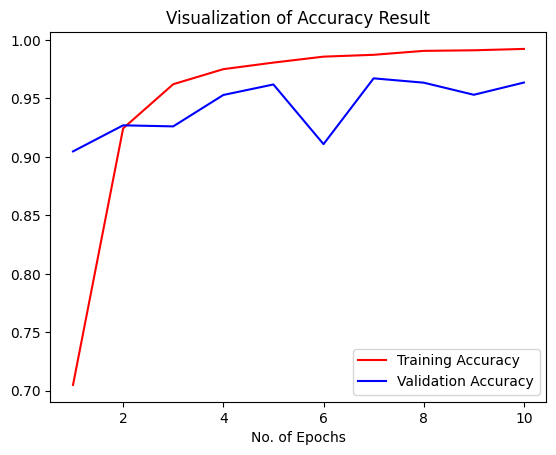

In [13]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [14]:
class_name = validation_set.class_names

In [16]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [17]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 121s 7ms/step


In [18]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [19]:
cm = confusion_matrix(Y_true,predicted_categories)

In [20]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.98      0.96       504
                                 Apple___Black_rot       0.97      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.97      1.00      0.98       440
                                   Apple___healthy       0.98      0.95      0.96       502
                               Blueberry___healthy       0.99      0.94      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.89      0.92       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.98      0.

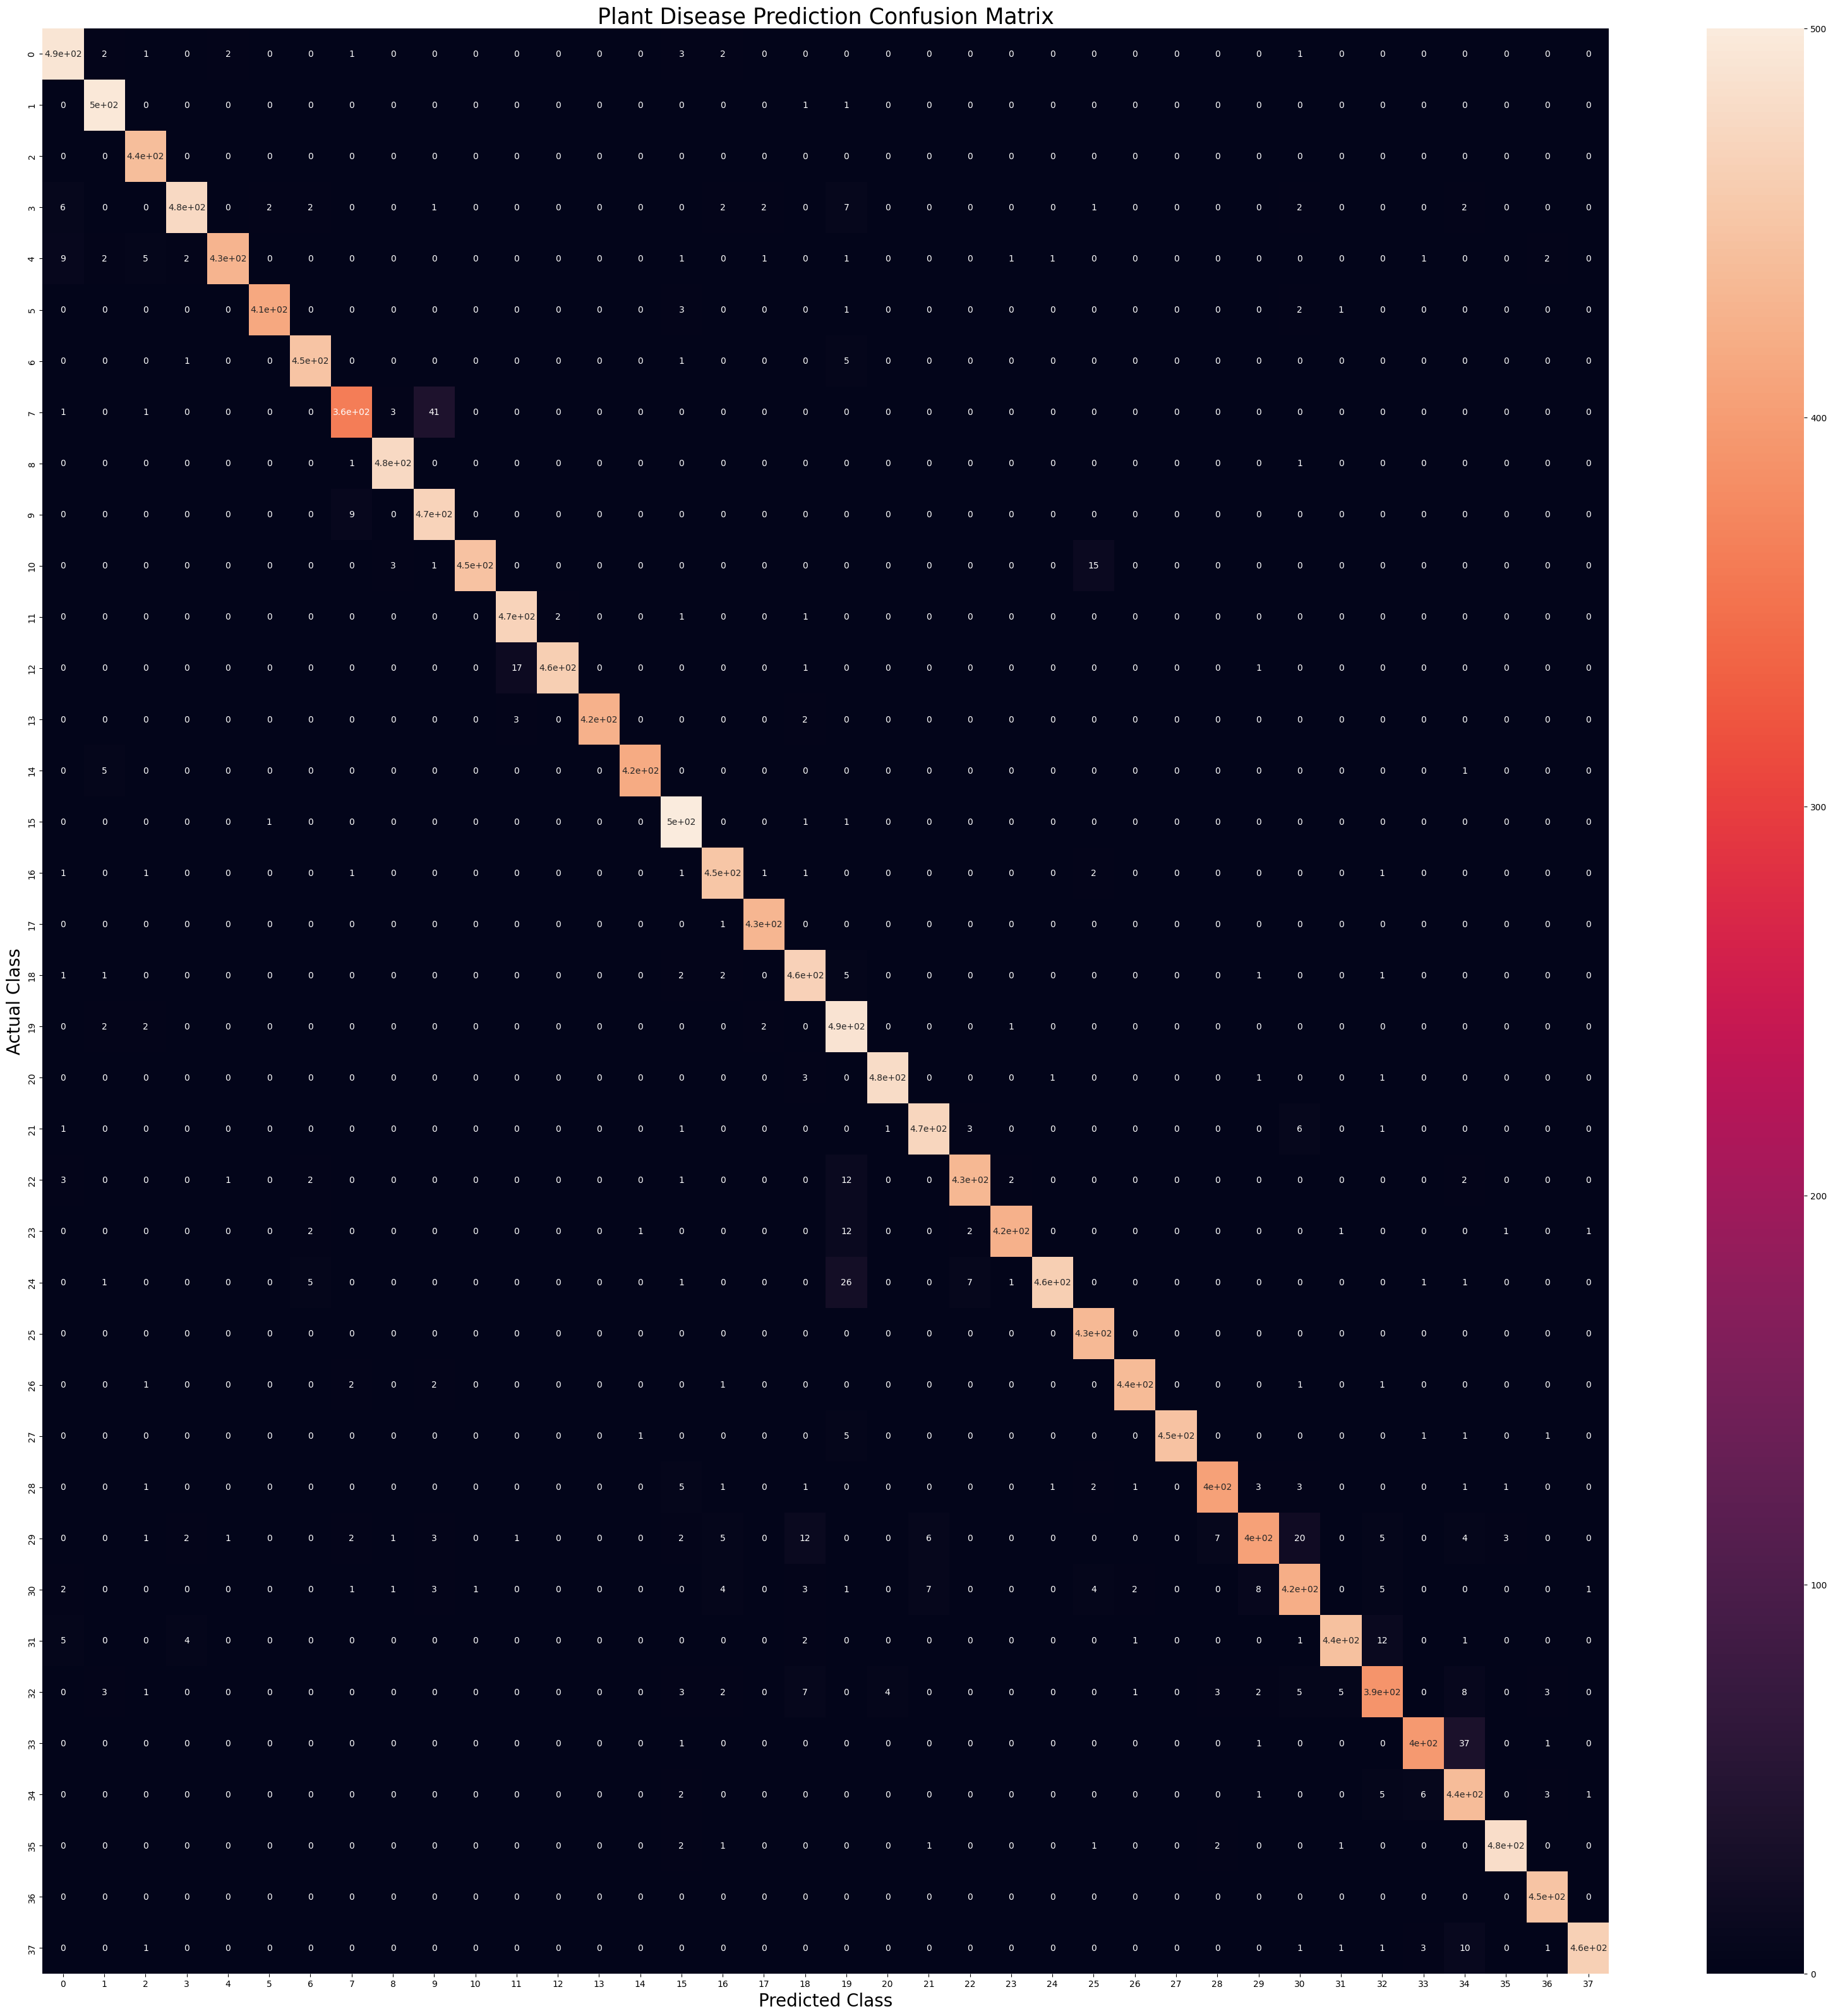

In [21]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()